In [ ]:
!pip install tushare
!pip install tqdm
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import glob
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 3.4 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
sp_price = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/sp300_price.csv')
sp_price.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08


In [ ]:
sp_price.columns

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Amount', 'ret1'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your data (replace 'your_file.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/sp300_price.csv')

# 2. Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# 3. Find top 100 tickers by total volume
top_tickers = (
    df.groupby('Ticker')['Volume']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
    .tolist()
)

# 4. Filter the dataframe for just these tickers
df_top = df[df['Ticker'].isin(top_tickers)]

# 5. Loop and plot for each ticker, saving as png
for ticker in top_tickers:
    data = df_top[df_top['Ticker'] == ticker]
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data['Close'], label=f'{ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(f'Close Price Over Time for {ticker}')
    plt.legend()
    plt.tight_layout()
    plt.legend()
    plt.tight_layout()
    plt.show()  # Show in Jupyter notebook

print("Plots saved for all top 100 tickers.")


Output hidden; open in https://colab.research.google.com to view.

In [90]:
# import os
# import glob
# #/content/close_ABT.png
# # Path pattern for the files you want to delete
# file_pattern = '/content/close_*.png'

# # Get all matching file paths
# files = glob.glob(file_pattern)

# # Loop and remove each file
# for file_path in files:
#     os.remove(file_path)

# print(f"Deleted {len(files)} PNG files matching close_*.png")


Deleted 98 PNG files matching close_*.png


In [ ]:
sp_basic = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/sp300_basic.csv')
sp_basic.head()

,ticker,trade_date,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,FOXA,2025-05-27,0.009493,NaN,0.743305,13.609756,13.609756,2.181221,1.469167,1.469167,0.98,0.98,214036992,343207050,NaN,23660929024,1.915095e+10
1,PARA,2025-05-27,0.007137,NaN,0.514671,NaN,NaN,0.490280,0.296184,0.296184,1.67,1.67,633454976,606229631,NaN,8506413056,7.292942e+09
2,FOX,2025-05-27,0.002710,NaN,0.714726,12.475611,12.475611,1.999453,1.469169,1.469169,1.07,1.07,235580992,343207050,NaN,23660967936,1.755504e+10
3,OMC,2025-05-27,0.010017,NaN,0.553675,9.993271,9.993271,3.312662,0.923276,0.923276,3.83,3.83,195834000,192867603,NaN,14540674048,1.432042e+10
4,T,2025-05-27,0.004640,NaN,0.808375,16.803680,16.803680,1.899709,1.604953,1.604953,4.05,4.05,7200739840,7180995106,NaN,197303320576,1.966875e+11


In [ ]:
# .sort_values(['ts_code', 'trade_date']).reset_index(drop=True)
sp_price.sort_values(['Ticker', 'Date']).reset_index(drop=True)
len(sp_price)

75000

In [ ]:
sp_price['ret1'] = sp_price.groupby('Ticker')['Adj Close'].pct_change(1)*100
# sp_price['pct_change'] = sp_price.groupby('Ticker')['Adj Close']-sp_price.groupby('Ticker')['Adj Close'].shift(-1)

In [ ]:
sp_price.head(5)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount,ret1
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08,NaN
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08,-1.841983
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08,-9.664558
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08,-0.768511
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08,0.759128


In [ ]:
daily_price = {}
daily_price['close'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Adj Close')
daily_price['volume'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Volume')
daily_price['returns'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='ret1')
daily_price['high'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='High')
daily_price['low'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Low')
daily_price['open'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Open')
daily_price['volume'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Volume')
daily_price['amount'] = pd.pivot(sp_price, index='Date', columns='Ticker', values='Amount')
daily_price['vwap'] = (daily_price['amount']*1000 / daily_price['volume']*100+1).fillna(0)

In [ ]:
daily_price.keys()

dict_keys(['close', 'volume', 'returns', 'high', 'low', 'open', 'amount', 'vwap'])

In [ ]:
def fun(x):
    if np.isnan(x):
        return np.nan
    else:
        return min(10,int(x*10)+1)


In [ ]:
import numpy as np
import pandas as pd
from numpy import abs
from numpy import log
from numpy import sign
from scipy.stats import rankdata

def ts_sum(df, window=10):
    return df.rolling(window).sum()

def sma(df, window=10):
    return df.rolling(window).mean()

def stddev(df, window=10):
    return df.rolling(window).std()

def correlation(x, y, window=10):
    return x.rolling(window).corr(y)

def ts_corr(x, y, window):
    return x.rolling(window).corr(y)
def covariance(x, y, window=10):
    return x.rolling(window).cov(y)

def rolling_rank(na):
    return rankdata(na)[-1]

def ts_rank(df, window=10):
    return df.rolling(window).apply(rolling_rank)

def rolling_prod(na):
    return np.prod(na)

def product(df, window=10):
    return df.rolling(window).apply(rolling_prod)

def ts_min(df, window=10):
    return df.rolling(window).min()

def ts_max(df, window=10):
    return df.rolling(window).max()

def ts_median(df, window=10):
    return df.rolling(window).median()

def ts_delta(df, period):
    return df.diff(period)

def ts_delay(df,period):
    return df.shift(period)

def delta(df, period=1):
    return df.diff(period)

def delay(df, period=1):
    return df.shift(period)

def rank(df):
    return df.rank(axis=1, pct=True)
#     return df.rank(pct=True)

def ts_rank(df, window):
    return df.rolling(window).apply(rolling_rank)

def scale(df, k=1):
    return df.mul(k).div(np.abs(df).sum())

def ts_argmax(df, window=10):
    return df.rolling(window).apply(np.argmax) + 1

def ts_argmin(df, window=10):
    return df.rolling(window).apply(np.argmin) + 1

In [ ]:
class AlphaLib(object):
    def __init__(self, daily_info):
        self.open = daily_info['open']
        self.high = daily_info['high']
        self.low = daily_info['low']
        self.close = daily_info['close']
        self.vwap = daily_info['vwap']
        self.volume = daily_info['volume']
        self.amount = daily_info['amount']
        self.returns = daily_info['returns']

    def calcu_alpha(self):
        alpha_dict={}
        alpha_dict['alpha01']=-1*((self.close/sma(self.close,10)-1)*self.amount).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha02']=sma(self.amount,5).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha06']=sma((self.close/sma(self.close, 5)-1)*self.amount,5).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha07']=ts_max((self.close/sma(self.close, 15)-1)*self.amount,15).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha08']=ts_min((self.close/ts_max(self.close, 60)-1)*self.amount,10).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha09']=ts_max((self.close/ts_min(self.close, 60)-1)*self.amount,50).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha10']=ts_max((self.close/ts_min(self.close, 20)-1)*self.amount,15).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha12']=ts_max((ts_max(self.high,30)/ts_min(self.low, 30)-1)*self.amount,20).div(self.amount.sum(1),axis=0)
        alpha_dict['alpha13']=ts_max(self.high-self.low, 30)/ts_min(self.close+self.open, 30)
        alpha_dict['alpha14']=ts_sum(self.amount*(self.close-self.open), 5)
        alpha_dict['alpha15']=ts_max(self.amount*(self.high-self.low), 15)
        alpha_dict['alpha16']=ts_sum(self.amount*(self.close-self.vwap), 5)
        alpha_dict['alpha17']=ts_min(self.amount*(self.low-self.vwap), 15)
        alpha_dict['alpha18']=ts_min(self.amount*(self.open-self.vwap), 15)
        alpha_dict['alpha19']=ts_min(self.amount*(self.open-self.low), 10)
        alpha_dict['alpha20']=ts_max(self.amount*(self.close-self.low), 10)
        alpha_dict['alpha21']=ts_median(self.amount,15)/ts_sum(self.amount,15)
        alpha_dict['alpha23']=ts_max(self.amount,15)/ts_min(self.amount,10)
        alpha_dict['alpha24']=ts_sum(self.amount.div(self.amount.sum(1),axis=0),5)
        print("enter 24\n")

        alpha_dict['alpha28']=(ts_max(self.close,5)/delay(self.close,5))*ts_min(self.close,5)/self.close

        tmp2=abs((self.close-self.open)/(self.high-self.low+0.01))
        alpha_dict['alpha29']=ts_max(tmp2,6)/ts_min(tmp2,6)
        alpha_dict['alpha30']=tmp2/delay(tmp2,4)

        tmp3=abs((self.low-self.open)/(self.close-self.low+0.01))
        alpha_dict['alpha31']=ts_max(tmp3,4)/ts_min(tmp3,4)

        tmp4=abs((self.high-self.open)/(self.close-self.low+0.01))
        alpha_dict['alpha32']=ts_max(tmp4,2)/ts_min(tmp4,2)
        alpha_dict['alpha33']=(-1)*ts_corr(self.high,rank(self.volume),60)
        alpha_dict['alpha34']=(-1)*rank(ts_delta(((self.close-self.low)-(self.high-self.close))/(self.close-self.low),9))
        # alpha_dict['alpha35']=ts_rank(ts_mean(power(self.close,2),60))
        alpha_dict['alpha36']=(-0.2)*ts_rank(self.close,2)
        alpha_dict['alpha_w_005'] = -1*(rank((self.open - (ts_sum(self.vwap, 10) / 10))) * (-1 * abs(rank((self.close - self.vwap)))))

        return  alpha_dict

# -ts_regression(returns, volume, 60)+rank((high+low+open)/3-close)+ ts_rank(operating_income/cap,252)-0.2*rank(ts_delta(close,2))
# (scale(((ts_sum(close, 7) / 7) - close)) + (20 * scale(ts_corr(vwap, ts_delay(close, 5),
# 230))))
#  -1*ts_corr(high,rank(volume),60)-0.2*ts_rank(close,2)
#   (-1 * ts_corr(high, rank(volume), 5))+rank((-1 * ((1 - (open / close))^1)))
#   -0.2*rank(ts_delta(close,2))+liabilities/assets
# (-1 * rank(((ts_sum(open, 5) * ts_sum(returns, 5)) - ts_delay((ts_sum(open, 5) * ts_sum(returns, 5)), 10))))
# -rank(ts_delta(((close-low)-(high-close))/(close-low), 9))+rank((high + low + open)/3 - close)+ts_rank(operating_income/cap,252)
# +ts_rank(eps/equity,252)+rank(ts_mean(power(fnd6_intc,2),60))-0.2*rank(ts_delta(close,2))+liabilities/assets
# ts_rank(operating_income/cap, 252)-0.3*rank(ts_delta(close, 2))
###liabilities/assets


In [ ]:
tmp_class = AlphaLib(daily_price)
alpha_dict = tmp_class.calcu_alpha()

enter 24



In [ ]:
alpha_34 = alpha_dict['alpha34']
alpha_w = alpha_dict['alpha_w_005']

In [ ]:
# alpha_34 = alpha_34.dropna()
# alpha_w = alpha_w.dropna()
# alpha_34

In [ ]:
# alpha_34.head()

In [ ]:
# alpha_34_new = alpha_34.unstack().reset_index().rename(columns={0:'factor'})
# alpha_34_new.head()
# len(alpha_34_new)
# alpha_34_new = alpha_34.unstack().reset_index().rename(columns={0:'factor'})
alpha = alpha_w.unstack().reset_index().rename(columns={0:'factor'})

In [ ]:
# alpha_34_new

In [ ]:
alpha.factor.describe()

,factor
count,72300.000000
mean,0.334948
std,0.299027
min,0.000011
25%,0.063333
50%,0.251644
75%,0.564978
max,1.000000


In [ ]:
alpha.head()

,Ticker,Date,factor
0,A,2024-05-28,NaN
1,A,2024-05-29,NaN
2,A,2024-05-30,NaN
3,A,2024-05-31,NaN
4,A,2024-06-03,NaN


In [ ]:
# alpha = pd.merge(alpha_34_new,sp_price[['Date','Ticker','ret1']],how = 'left', on = ['Date','Ticker'])
alpha = pd.merge(alpha,sp_price[['Date','Ticker','ret1']],how = 'left', on = ['Date','Ticker'])
alpha.head()

,Ticker,Date,factor,ret1
0,A,2024-05-28,NaN,NaN
1,A,2024-05-29,NaN,-1.841983
2,A,2024-05-30,NaN,-9.664558
3,A,2024-05-31,NaN,-0.768511
4,A,2024-06-03,NaN,0.759128


In [ ]:
alpha['factor_rank'] = alpha.groupby(['Date']).factor.rank(pct=True,method='dense')
alpha.factor_rank.value_counts()

,count
factor_rank,
1.000000,272
0.500000,134
0.666667,89
0.333333,89
0.250000,65
...,...
0.534247,1
0.420455,1
0.412969,1


In [ ]:
alpha['factor_rank_bin'] = alpha.factor_rank.apply(fun)
alpha.factor_rank_bin.value_counts()

,count
factor_rank_bin,
10.0,7680
2.0,7416
9.0,7350
1.0,7281
3.0,7134
8.0,7121
6.0,7117
7.0,7104
4.0,7075


In [ ]:
alpha.head(100)

,Ticker,Date,factor,ret1,factor_rank,factor_rank_bin
0,A,2024-05-28,NaN,NaN,NaN,NaN
1,A,2024-05-29,NaN,-1.841983,NaN,NaN
2,A,2024-05-30,NaN,-9.664558,NaN,NaN
3,A,2024-05-31,NaN,-0.768511,NaN,NaN
4,A,2024-06-03,NaN,0.759128,NaN,NaN
...,...,...,...,...,...,...
95,A,2024-10-11,0.196544,0.756626,0.452206,5.0
96,A,2024-10-14,0.201000,0.298976,0.467391,5.0
97,A,2024-10-15,0.202489,0.228767,0.450549,5.0
98,A,2024-10-16,0.209933,-3.783373,0.444043,5.0


<Axes: xlabel='Date'>

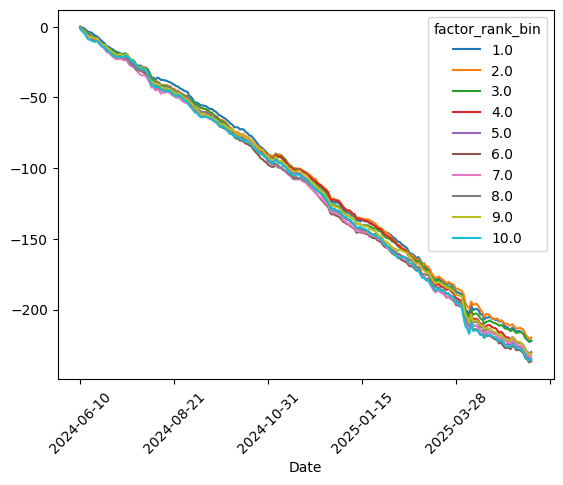

In [ ]:
(alpha.groupby(['factor_rank_bin', \
        'Date']).ret1.mean()-1).unstack().T.cumsum().plot(rot=45)

<Axes: xlabel='Date'>

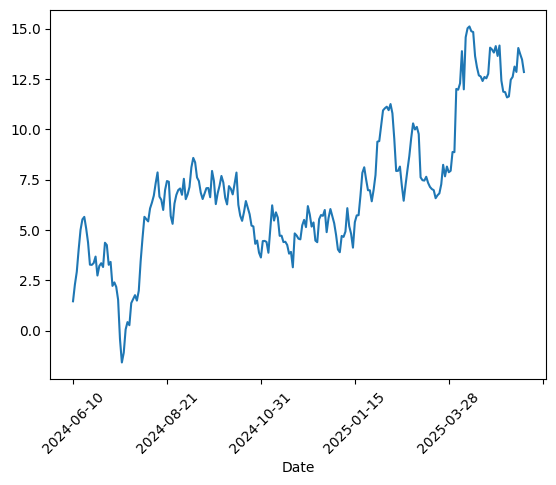

In [ ]:
##计算做多做空收益
##做多factor最大的一组，做空factor最小的一组

long_ret = (alpha[(alpha.factor_rank_bin == 1)].groupby('Date').ret1.mean()-1).cumsum()
short_ret = (alpha[(alpha.factor_rank_bin == 10)].groupby('Date').ret1.mean()-1).cumsum()
(long_ret - short_ret).plot(rot=45)

In [ ]:
ret_PD = (alpha.groupby(['factor_rank_bin', 'Date']).ret1.mean()-1.00).unstack().T

if ret_PD[1.0].mean()>ret_PD[10].mean():
    ret_PD['diff'] = ret_PD[1.0] - ret_PD[10]
else:
    ret_PD['diff'] = ret_PD[10] - ret_PD[1.0]


In [ ]:
def max_dd(returns):
    r = returns.cumsum()+1
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = returns.index[dd.argmin()]
    start = returns.index[r.loc[:end].argmax()]
    return mdd, start, end


def calc_pfmc(ret_PD):
    performance = []
    for i in [1,2,3,4,5,6,7,8,9,10,'diff']:
        returnlist = ret_PD[i]
        ret_year = (returnlist.mean()-0)*252
        ret_sharpe = (returnlist.mean()-0)/returnlist.std()*(252**0.5)
        max_draw, start, end = max_dd(returnlist)
        winratio = (returnlist>0).sum()/len(returnlist)
        std = returnlist.std()
        performance.append([i,ret_year,ret_sharpe,std,winratio,max_draw])
    performance = pd.DataFrame(performance,columns = ['group_name','return','sharpe',\
                    'std','winratio','mdd'])
    return performance

calc_pfmc(ret_PD)

,group_name,return,sharpe,std,winratio,mdd
0,1,-232.401651,-12.977506,1.128100,0.145228,-189.838676
1,2,-229.726441,-13.842956,1.045399,0.161826,-1387.806222
2,3,-231.809148,-13.534129,1.078947,0.136929,-1136.515882
3,4,-240.666955,-12.986947,1.167372,0.153527,0.000000
4,5,-245.181586,-13.756335,1.122755,0.141079,-1551.116812
5,6,-247.133227,-13.631344,1.142069,0.116183,-369.773773
6,7,-243.060223,-13.359604,1.146093,0.145228,0.000000
7,8,-240.505005,-14.110882,1.073667,0.145228,0.000000
8,9,-241.633359,-12.894982,1.180418,0.149378,-1280.116376
9,10,-245.827789,-11.348650,1.364541,0.174274,0.000000


In [ ]:
ICvalue = alpha.groupby(['Date'])[['factor','ret1']].corr()['factor'].reset_index()
ICvalue = ICvalue[ICvalue.level_1=='ret1']
ICvalue = ICvalue[['Date','factor']].set_index('Date')

<Axes: xlabel='Date'>

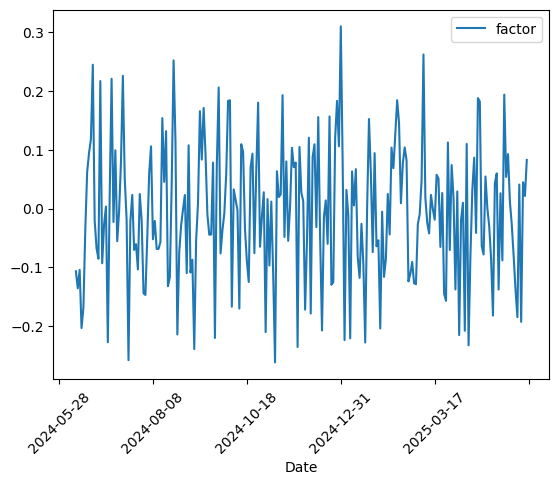

In [ ]:
ICvalue.plot(rot=45)